 # Resnet
![image-resnet](./photo/resnet.png)

## Resnet 18

In [12]:
import numpy as np
import os
import torch
from torch.utils import data
from torch.utils.data import Dataset
from torch import nn

In [13]:
from DataAndModel import read_data, npdata, resnet_block18, transfrom

In [14]:
train_img,train_label = read_data('./data/data/img_train.npy','./data/data/label_train.npy', transfrom(transpose=(0,3,1,2)))
test_img,test_label = read_data('./data/data/img_test.npy','./data/data/label_test.npy', transfrom(transpose=(0,3,1,2)))

train_data = npdata(train_img, train_label)
test_data = npdata(test_img, test_label)


In [15]:
batch_size = 128
train_it = data.DataLoader(train_data, batch_size,shuffle=True,num_workers=0)
test_it = data.DataLoader(test_data, batch_size,num_workers=0)

In [16]:
b1 = nn.Sequential(nn.Conv2d(3, 64, kernel_size=3, stride=1, padding=1),
                   nn.BatchNorm2d(64), nn.ReLU(),
                   nn.MaxPool2d(kernel_size=3, stride=2, padding=1))


In [17]:
b2 = nn.Sequential(*resnet_block18(64, 64, 2, first_block=True))
b3 = nn.Sequential(*resnet_block18(64, 128, 2))
b4 = nn.Sequential(*resnet_block18(128, 256, 2))
b5 = nn.Sequential(*resnet_block18(256, 512, 2))

In [18]:
net = nn.Sequential(b1, b2, b3, b4, b5,
                    nn.AdaptiveAvgPool2d((1,1)),
                    nn.Flatten(), nn.Linear(512, 5))

In [19]:
X = torch.rand(size=(1, 3, 96, 96))
for layer in net:
    X = layer(X)
    print(layer.__class__.__name__,'output shape:\t', X.shape)

Sequential output shape:	 torch.Size([1, 64, 48, 48])
Sequential output shape:	 torch.Size([1, 64, 48, 48])
Sequential output shape:	 torch.Size([1, 128, 24, 24])
Sequential output shape:	 torch.Size([1, 256, 12, 12])
Sequential output shape:	 torch.Size([1, 512, 6, 6])
AdaptiveAvgPool2d output shape:	 torch.Size([1, 512, 1, 1])
Flatten output shape:	 torch.Size([1, 512])
Linear output shape:	 torch.Size([1, 5])


loss 0.017, train acc 0.999, test acc 0.842
693.9 examples/sec on cuda:0


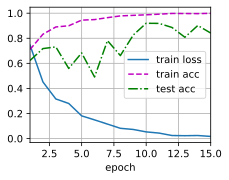

In [20]:
import TrainAndDraw as T
lr, num_epochs = 0.01, 15
T.train(net, train_it, test_it, num_epochs, lr, T.try_gpu(), 'resnet18',isini=1)